In [1]:
import cv2
import numpy as np
import onnxruntime as rt


In [2]:
img = cv2.imread('fYsTA9m.png')
print(img.shape)
#img = cv2.imread('NPlc2z8.png')
#img = cv2.imread('BfpQ0FF.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
tensor = (img / 127.5 - 1.0).reshape((1, 128, 128, 3)).transpose(0, 3, 1, 2)

(128, 128, 3)


In [3]:
import numpy as np
import onnxruntime as rt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
import time

In [5]:
sess = rt.InferenceSession('palm_detection.onnx')
time_start = time.time()
pred = sess.run(None, {'input': tensor.astype(np.float32)})
time_cur = time.time()
print(f"time spend : {time_cur - time_start}")

time spend : 0.0049877166748046875


In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def draw_patch(regressor, classificator, stride, anchor_count, column, row, anchor, offset, color):
  index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

  score = sigmoid(regressor[index][0])
  if score < 0.5: return

  x, y, w, h = classificator[index][:4]

  x += (column + 0.5) * stride - w / 2
  y += (row    + 0.5) * stride - h / 2

  rect = patches.Rectangle((x, y), w, h, color = color, fill = None)
  ax.add_patch(rect)
  """
  for key in range(7):
    x = classificator[index][4 + key * 2]
    y = classificator[index][5 + key * 2]
    
    x += (column + 0.5) * stride
    y += (row    + 0.5) * stride
    
    rect = patches.Rectangle((x, y), 1, 1, facecolor = color)
    ax.add_patch(rect) 
  """

C:\Users\addinedu\AppData\Local\Temp\ipykernel_18828\143689905.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


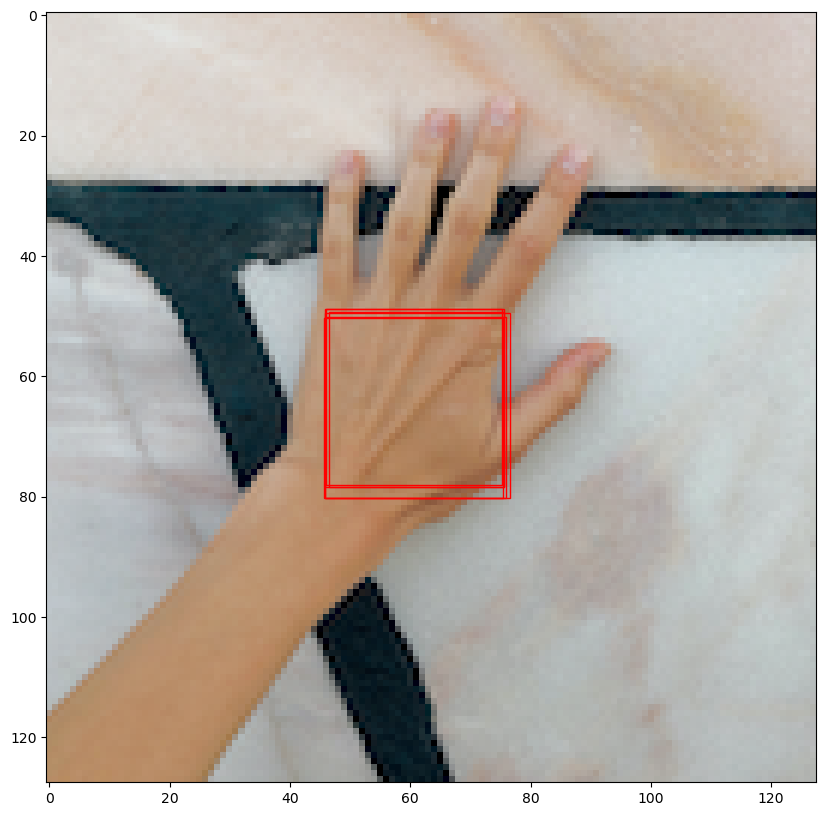

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)

for y in range(16):
  for x in range(16):
    for a in range(2):
      draw_patch(pred[1][0], pred[0][0], 8, 2, x, y, a, 0, 'r')

for y in range(8):
  for x in range(8):
    for a in range(6):
      draw_patch(pred[1][0], pred[0][0], 16, 6, x, y, a, 512, 'b')

plt.show()

In [8]:
len(pred)

2

In [9]:
print(pred[0].shape)
print(pred[1].shape)

(1, 896, 18)
(1, 896, 1)


In [13]:
def draw_rect(frame, regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.5: return

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 1)
    

In [14]:
# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(0)

# 영상 재생
while True:
    time_start = time.time()

    ret, frame = cap.read()
    

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, dsize=(128, 128))

    tensor = (frame / 127.5 - 1.0).reshape((1, 128, 128, 3)).transpose(0, 3, 1, 2)
    pred = sess.run(None, {'input': tensor.astype(np.float32)})


    for y in range(16):
        for x in range(16):
            for a in range(2):
                draw_rect(frame, pred[1][0], pred[0][0], 8, 2, x, y, a, 0)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                draw_rect(frame, pred[1][0], pred[0][0], 16, 6, x, y, a, 512)



    frame = cv2.resize(frame, dsize=(640, 480))
    
    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) == ord('q'):
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    time_cur = time.time()
    cv2.putText(frame, f"time spend : {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)


# 객체 해제
cap.release()
cv2.destroyAllWindows()

C:\Users\addinedu\AppData\Local\Temp\ipykernel_18828\143689905.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [3]:
import cv2
import time
import numpy as np
import onnxruntime as rt

sess = rt.InferenceSession('palm_detection.onnx')

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def draw_rect(frame, regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.5: return

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 1)

cap = cv2.VideoCapture(0)
while True:
    time_start = time.time()
    ret, frame = cap.read()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, dsize=(128, 128))

    tensor = (frame / 127.5 - 1.0).reshape((1, 128, 128, 3)).transpose(0, 3, 1, 2)
    pred = sess.run(None, {'input': tensor.astype(np.float32)})


    for y in range(16):
        for x in range(16):
            for a in range(2):
                draw_rect(frame, pred[1][0], pred[0][0], 8, 2, x, y, a, 0)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                draw_rect(frame, pred[1][0], pred[0][0], 16, 6, x, y, a, 512)


    frame = cv2.resize(frame, dsize=(640, 480))

    if cv2.waitKey(1) == ord('q'):
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    time_cur = time.time()
    cv2.putText(frame, f"time spend : {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)


cap.release()
cv2.destroyAllWindows()

C:\Users\addinedu\AppData\Local\Temp\ipykernel_4632\1527365752.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [2]:
import cv2
import time
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def draw_rect(frame, regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.5: return

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 1)

net = cv2.dnn.readNet('palm_detection.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture(0)
while True:
    time_start = time.time()
    ret, frame = cap.read()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, dsize=(128, 128))
    #tensor = (frame / 127.5 - 1.0).reshape((128, 128, 3)).transpose(2, 0, 1)

    tensor = (frame / 127.5 - 1.0).reshape((128, 128, 3))
    print(tensor.shape)
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    print(blob.shape)

    #blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), 1.0, (128, 128), (127.5, 127.5, 127.5), swapRB=True)
    net.setInput(blob)
    preds = net.forward(outNames)
    regressor = preds[0]
    classifier = preds[1]
    """
    print(regressor.shape)
    print(classifier.shape)
    print()
    """
    for y in range(16):
        for x in range(16):
            for a in range(2):
                draw_rect(frame, regressor[0], classifier[0], 8, 2, x, y, a, 0)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                draw_rect(frame, regressor[0], classifier[0], 16, 6, x, y, a, 512)
    
    frame = cv2.resize(frame, dsize=(640, 480))

    if cv2.waitKey(1) == ord('q'):
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    time_cur = time.time()
    cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)

cap.release()
cv2.destroyAllWindows()


('classificators', 'regressors')
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)


C:\Users\addinedu\AppData\Local\Temp\ipykernel_19388\2707778667.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 128, 128)
(128, 128, 3)
(1, 3, 1

: 